In [399]:
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

# Reading csv

In [400]:

drug_related_deaths_df = pd.read_csv('accident.csv')



In [401]:
drug_related_deaths_df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


# Data cleaning

In [402]:
data_df = drug_related_deaths_df.loc[:,['ID','Date','Age','Sex','Race','DeathCity','DeathCityGeo','COD','Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']]


In [403]:
data_df = data_df.dropna(subset=['Age', 'Sex','Race'], how='all')


In [404]:
data_df.update(data_df[['Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']].fillna('N'))


In [405]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df


,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,Cocaine,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
1,13-0102,2013-03-21,48.0,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,Y,...,N,N,N,N,N,N,N,N,N,N
2,16-0165,2016-03-13,30.0,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,Y,...,N,N,N,N,N,N,N,N,N,Y
3,16-0208,2016-03-31,23.0,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,Y
4,13-0052,2013-02-13,22.0,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N
5,14-0277,2014-06-29,23.0,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,2015-09-08,43.0,Male,White,CHESHIRE,"CHESHIRE, CT\n(41.498834, -72.901448)",Acute Intoxication due to the Combined Effects...,N,N,...,N,Y,N,N,N,N,N,N,N,N
5101,17-0618,2017-07-22,21.0,Male,White,NEW HAVEN,"New Haven, CT\n(41.308252, -72.924161)","Multidrug Toxicity Including Heroin, Alprazola...",Y,N,...,N,Y,N,N,N,N,N,N,N,N
5102,18-0646,2018-08-14,30.0,Male,White,DANBURY,"DANBURY, CT\n(41.393666, -73.451539)","Multidrug Toxicity Including Heroin, Fentanyl,...",Y,N,...,N,N,N,N,Y,N,N,N,N,Y
5103,14-0124,2014-03-16,33.0,Male,White,WINDSOR,"WINDSOR, CT\n(41.852781, -72.64379)",Acute Fentanyl intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N


In [406]:
data_df.head()

,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,Cocaine,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
1,13-0102,2013-03-21,48.0,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,Y,...,N,N,N,N,N,N,N,N,N,N
2,16-0165,2016-03-13,30.0,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,Y,...,N,N,N,N,N,N,N,N,N,Y
3,16-0208,2016-03-31,23.0,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,Y
4,13-0052,2013-02-13,22.0,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N
5,14-0277,2014-06-29,23.0,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,N


# Top 3 Drugs contributing to Accidental death

In [407]:
narrowed2_df = data_df.copy()
narrowed3_df = data_df.copy()

In [408]:
drugnames = list(narrowed2_df.columns[9:23])


In [409]:

totalvalue = []


In [410]:
for drug in drugnames:
    counter = 0
    for index , value in narrowed2_df.iterrows():
        if(narrowed2_df.at[index,drug] != 'N'):
            counter = counter + 1
    totalvalue.append(counter)

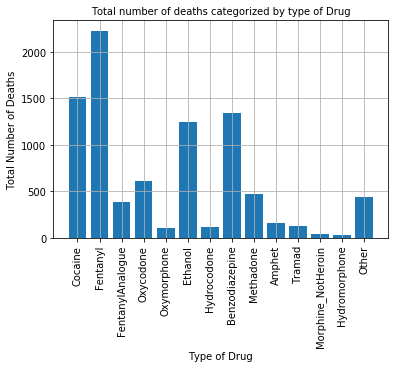

In [364]:
plt.bar(drugnames,totalvalue)
plt.xlabel('Type of Drug',fontsize = 10)
plt.ylabel('Total Number of Deaths',fontsize = 10)
plt.title('Total number of deaths categorized by type of Drug', fontsize = 10)
plt.grid(True)
plt.xticks(drugnames, drugnames, rotation='vertical')
plt.savefig('/Users/laharitadepalli/Documents/AitFinal1/Deaths_Per_Drug_Type.png')


In [365]:
narrowed_df.index = pd.to_datetime(narrowed_df['Date'],format='%m/%d/%y %I:%M%p')
deaths_by_year_month_df = narrowed_df.groupby(by=[narrowed_df.index.year,narrowed_df.index.month]).agg({'ID':'count'})

In [366]:
deaths_per_months_df = pd.DataFrame(columns=['Month', 'Deaths Per Month'])
for index, row in deaths_by_year_month_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    deaths_per_months_df = deaths_per_months_df.append({'Month': converted_date, 'Deaths Per Month': count}, ignore_index=True)


In [367]:
deaths_per_months_df.set_index('Month', inplace=True)
deaths_per_months_df.head()

,Deaths Per Month
Month,
2012-01-01,31
2012-02-01,27
2012-03-01,24
2012-04-01,30
2012-05-01,28


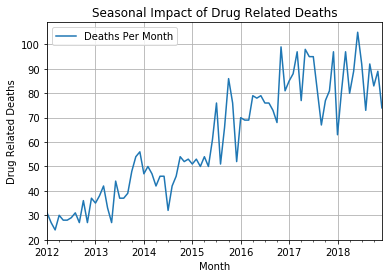

In [368]:
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

deaths_per_months_df[(start_date <= deaths_per_months_df.index) & (deaths_per_month_df.index <= end_date)].plot(grid='on')
plt.title('Seasonal Impact of Drug Related Deaths')
plt.ylabel('Drug Related Deaths')
plt.savefig('/Users/laharitadepalli/Documents/AitFinal1/Deaths_Per_season.png')

In [369]:
gender_df = narrowed_df.loc[narrowed_df['Sex'].isin(['Female','Male'])]
grouped_gender_df = gender_df.groupby(["Sex"]).agg({'ID':'count'})
grouped_gender_df.head()

,ID
Sex,
Female,1325
Male,3773


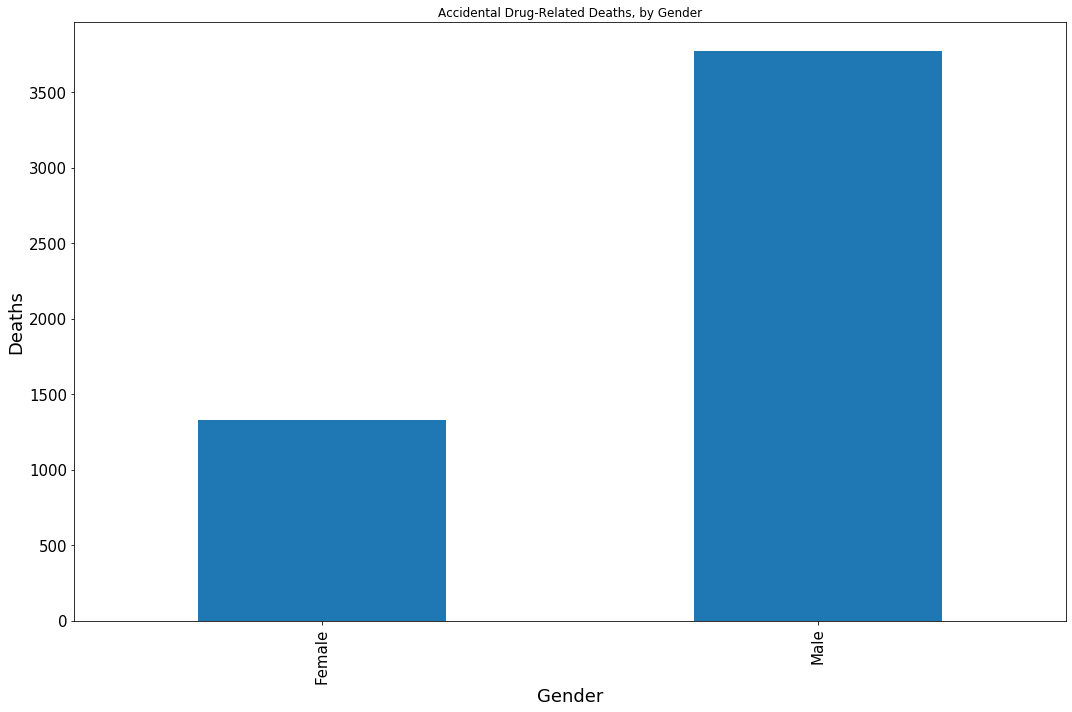

In [370]:
#Graph of Accidental Drug-related Deaths by Sex
ax = grouped_gender_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Gender", figsize=(15, 10), legend=False, fontsize=15)
plt.xlabel("Gender", fontsize=18)
plt.ylabel("Deaths", fontsize=18)
plt.tight_layout()
plt.show()


In [371]:
grouped_race_df = narrowed_df.groupby(["Race"]).agg({'ID':'count'})
grouped_race_df.head(15)

,ID
Race,
Asian,34
Black,433
Hispanic,585
Native American,1
Other,35
White,4004


In [372]:
narrowed_df["Race"].replace({"Asian Indian": "Asian", "Asian, Other": "Asian", "Chinese":"Asian","Hawaiian":"Other","Unknown": "Other", "Native American, Other": "Native American", "Hispanic, Black": "Hispanic", "Hispanic, White": "Hispanic"}, inplace=True)

grouped_race_df = narrowed_df.groupby(["Race"]).agg({'ID':'count'})


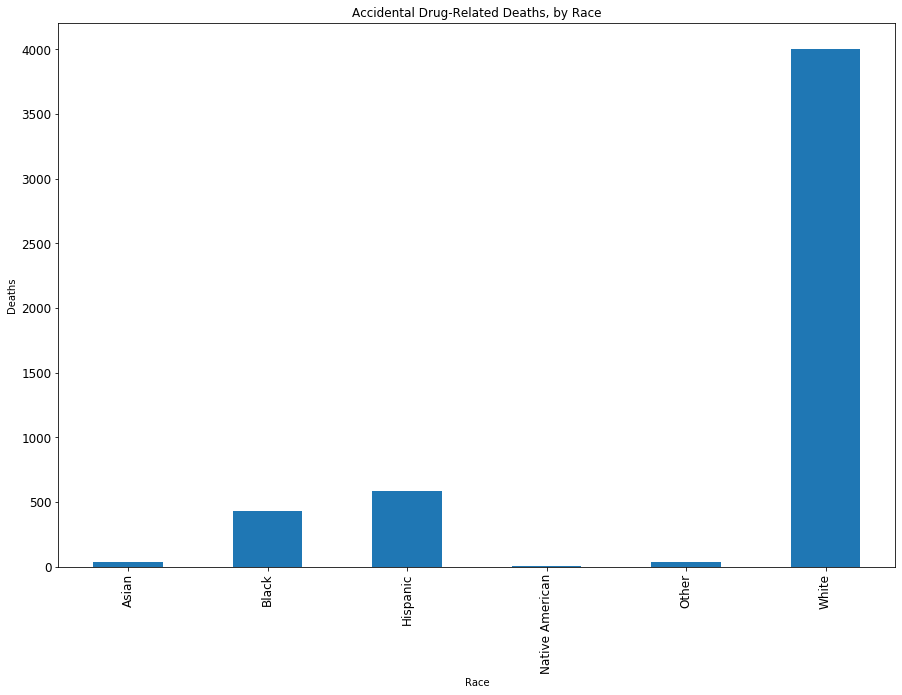

In [373]:
ax = grouped_race_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Race", figsize=(15, 10), legend=False, fontsize=12)
plt.xlabel("Race")
plt.ylabel("Deaths")
plt.show()

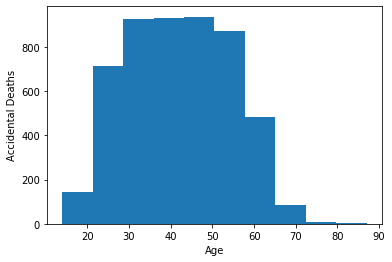

In [374]:
Agedeaths = narrowed_df["Age"]

plt.hist(Agedeaths)
plt.xlabel("Age")
plt.ylabel("Accidental Deaths")
plt.show()

In [375]:
bins = [-1, 25, 41, 66, 199]
AgeGroups = ['Under 25','25-40','41-65','over 65']

#Place data series into new column in dataframe
narrowed_df["Age Group"] = pd.cut(narrowed_df["Age"], bins, labels=AgeGroups)
narrowed_df.head()

grouped_AgeGroup_df = narrowed_df.groupby(["Age Group"]).agg({'ID':'count'})
grouped_AgeGroup_df.head(10)

,ID
Age Group,
Under 25,503
25-40,2006
41-65,2522
over 65,71


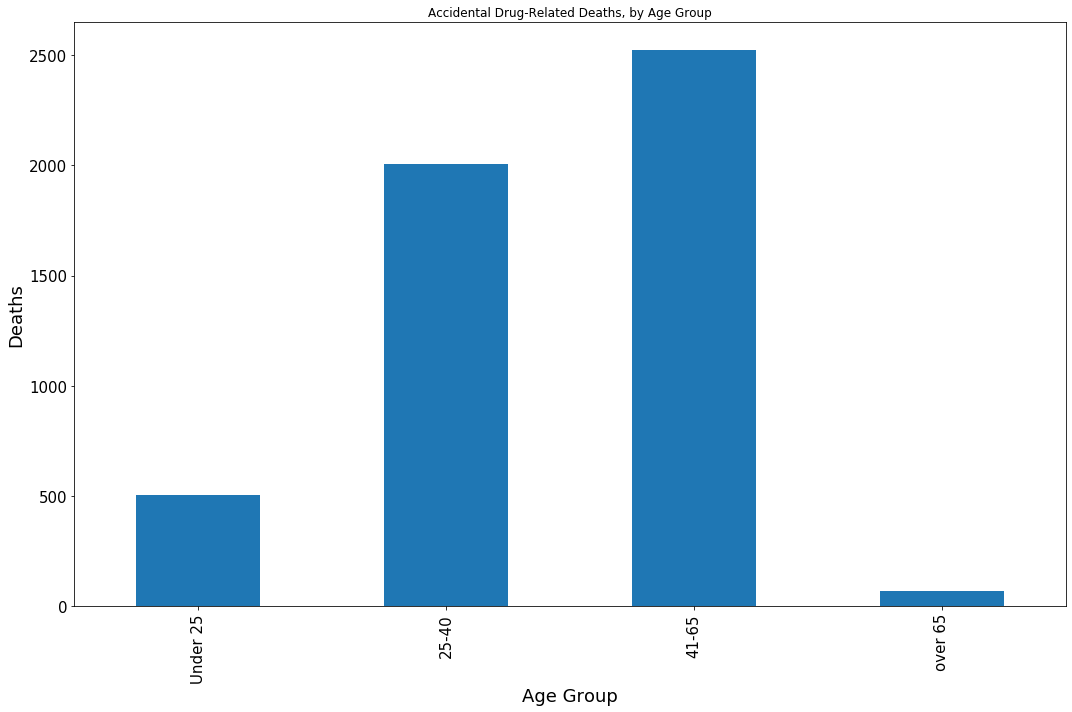

In [376]:
ax = grouped_AgeGroup_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Age Group", figsize=(15, 10), legend=False, fontsize=15)
plt.xlabel("Age Group", fontsize=18)
plt.ylabel("Deaths", fontsize=18)
plt.tight_layout()
plt.show()

In [377]:
ab= pd.read_csv("accident.csv")




In [378]:
ab.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [379]:
ab.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [380]:
ab.shape

(5105, 41)

In [381]:
ab.dropna(subset=['DeathCity'],how ='any').shape

(5100, 41)

In [382]:
newdata = ab.fillna(0)

In [383]:
newdata.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,0,0,NORWALK,...,0,0,0,0,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,0,0,0,0,0,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",0
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,0,0,0,0,0,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",0,0
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,0,GREENWICH,...,0,0,0,0,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",0,"CT\n(41.575155, -72.738288)"


In [384]:
d_count = newdata.replace({'Y':1})

In [385]:
d_count.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,0,0,NORWALK,...,0,0,0,0,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,0,0,0,0,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",0
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,0,0,0,0,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",0,0
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,0,GREENWICH,...,0,0,0,0,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",0,"CT\n(41.575155, -72.738288)"


In [386]:
drug_count = d_count.groupby('DeathCity').sum()

In [387]:
drug_count.head()

,Age,Heroin,Cocaine,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
DeathCity,,,,,,,,,,,,,,
0,65.0,0,2,0,0,0,0,1,1,0,0,0,0,0
06340,51.0,0,1,0,0,0,1,0,0,0,0,0,0,0
AMSTON,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0
ANDOVER,125.0,1,0,0,2,0,1,0,0,0,0,0,0,0
ANSONIA,940.0,6,4,1,8,1,5,0,8,5,1,0,0,0


In [388]:
#return Index
drug_count.index.name = None
drug_count.index.name = 'DeathCity'
drug_count.reset_index(inplace = True)
drug_count.head()

,DeathCity,Age,Heroin,Cocaine,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
0,0,65.0,0,2,0,0,0,0,1,1,0,0,0,0,0
1,06340,51.0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,AMSTON,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,ANDOVER,125.0,1,0,0,2,0,1,0,0,0,0,0,0,0
4,ANSONIA,940.0,6,4,1,8,1,5,0,8,5,1,0,0,0


In [389]:
drug_count['Total Amount of Drugs'] = drug_count['Heroin'] + drug_count['Cocaine'] + drug_count['FentanylAnalogue'] + drug_count['Oxycodone'] + drug_count['Oxymorphone'] + drug_count['Ethanol'] + drug_count['Hydrocodone'] + drug_count['Benzodiazepine'] + drug_count['Methadone'] + drug_count['Amphet'] + drug_count['Tramad'] + drug_count['Hydromorphone']
drug_count.head()

,DeathCity,Age,Heroin,Cocaine,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,Total Amount of Drugs
0,0,65.0,0,2,0,0,0,0,1,1,0,0,0,0,0,4
1,06340,51.0,0,1,0,0,0,1,0,0,0,0,0,0,0,2
2,AMSTON,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,ANDOVER,125.0,1,0,0,2,0,1,0,0,0,0,0,0,0,4
4,ANSONIA,940.0,6,4,1,8,1,5,0,8,5,1,0,0,0,39


In [390]:
top = drug_count.nlargest(10,['Total Amount of Drugs'])
top

,DeathCity,Age,Heroin,Cocaine,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,Total Amount of Drugs
78,HARTFORD,24357.0,280,216,39,35,4,125,5,92,28,14,12,2,15,852
198,WATERBURY,15746.0,204,139,40,31,4,89,5,92,46,11,10,2,3,673
114,NEW HAVEN,16144.0,183,118,25,39,3,92,6,99,63,9,11,2,7,650
20,BRIDGEPORT,14655.0,178,128,22,29,6,99,6,88,48,7,5,0,7,616
109,NEW BRITAIN,9832.0,96,59,20,33,4,56,4,56,14,7,5,1,10,355
96,MERIDEN,5900.0,75,50,15,12,5,39,3,36,13,6,2,1,4,257
22,BRISTOL,5881.0,68,40,12,12,3,30,4,48,14,4,7,0,2,242
133,NORWICH,5950.0,73,39,5,14,2,34,6,32,8,5,0,2,4,220
40,DANBURY,5373.0,68,32,12,14,2,26,3,33,12,4,6,0,2,212
115,NEW LONDON,5714.0,76,37,5,13,2,35,6,20,9,3,4,0,1,210


In [391]:
top_d_t = top.loc[:,['DeathCity','Total Amount of Drugs']]
top_d_t

,DeathCity,Total Amount of Drugs
78,HARTFORD,852
198,WATERBURY,673
114,NEW HAVEN,650
20,BRIDGEPORT,616
109,NEW BRITAIN,355
96,MERIDEN,257
22,BRISTOL,242
133,NORWICH,220
40,DANBURY,212
115,NEW LONDON,210


In [392]:
topten = top_d_t.groupby('DeathCity').sum()
newtopten = topten.nlargest(10,['Total Amount of Drugs'])
newtopten

,Total Amount of Drugs
DeathCity,
HARTFORD,852
WATERBURY,673
NEW HAVEN,650
BRIDGEPORT,616
NEW BRITAIN,355
MERIDEN,257
BRISTOL,242
NORWICH,220
DANBURY,212


Text(0, 0.5, 'Number of Deaths')

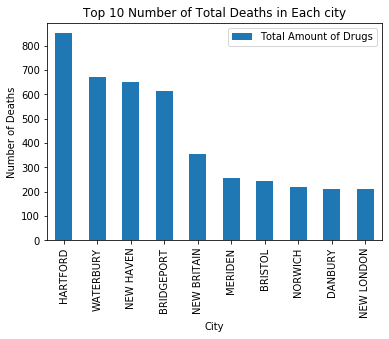

In [393]:
bdd = newtopten.plot.bar(rot='vertical',title='Top 10 Number of Total Deaths in Each city')
bdd.set_xlabel("City")
bdd.set_ylabel("Number of Deaths")

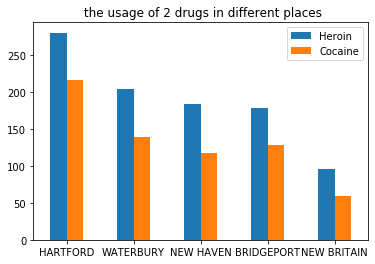

In [420]:
heroin = [280,204,183,178,96]
cocaine = [216,139,118,128,59]
index = ['HARTFORD','WATERBURY','NEW HAVEN','BRIDGEPORT','NEW BRITAIN']
df = pd.DataFrame({'Heroin': heroin,
                'Cocaine': cocaine}, index=index)
ax = df.plot.bar(rot=0,title = ' the usage of 2 drugs in different places')